In [52]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS") 


In [53]:
#observable = 'dphi'
#xtitle = r'$\Delta\phi$ [rad]'
#observable = 'jetpt'
#xtitle = r'jet $p_{T}$ [GeV]'
observable = 'qt'
xtitle = r'$q_{T}/Q$'
y = {} 
x = {} 
xerr = {}

mc = 'Django'
altmc = 'Rapgap'
names = {}
names['nominal'] = 'outputfiles_2/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,mc)
names['sys0']    = 'outputfiles_2/CrossSection_%s_%s_sys_0_ep0607_data_nominal.npy'%(observable,mc)
names['sys1']   =  'outputfiles_2/CrossSection_%s_%s_sys_1_ep0607_data_nominal.npy'%(observable,mc)
#names['sys6']   =  'outputfiles/CrossSection_%s_%s_sys_6_ep0607_data_nominal.npy'%(observable,mc)
#names['sys9']    = 'outputfiles_2/CrossSection_%s_%s_sys_9_ep0607_data_nominal.npy'%(observable,mc)#
#names['test']   = 'outputfiles/CrossSection_%s_%s_sys_1_ep0607_data_nominal.npy'%(observable,mc)
names['model']   = 'outputfiles/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,altmc)


label = {}
label['test'] = 'repeat'
label['sys0'] = 'HFS scale (in jet)'
label['sys1'] = 'HFS scale (remainder)'
label['sys6'] = 'lepton energy scale'
label['sys9'] = 'lepton azimuthal angle'
label['model'] = 'Model'
#names['sys10']   =  'CrossSection_jetpt_Django_nominal_em0405_data_nominal.npy'

In [54]:

for key in names.keys():
    with open('%s'%names[key], 'rb') as f:
        print(key)
        y[key] = np.load(f)
        x[key] = np.load(f)

        xerr[key] = np.load(f)
        print('y = ',y[key])
        print('x = ', x[key])
        #print(xerr[key])

nominal
y =  [5.07707513e+05 3.90026262e+05 1.89882742e+05 7.52131575e+04
 1.33793926e+04 3.24402298e+02]
x =  [0.04890375 0.11053469 0.24983602 0.56469184 1.27634468 2.88485791]
sys0
y =  [5.14412948e+05 3.86922123e+05 1.85729299e+05 7.24016875e+04
 1.24847238e+04 2.75689952e+02]
x =  [0.04890375 0.11053469 0.24983602 0.56469184 1.27634468 2.88485791]
sys1
y =  [4.81758830e+05 3.69425494e+05 1.81713927e+05 7.18896197e+04
 1.30819400e+04 2.98147807e+02]
x =  [0.04890375 0.11053469 0.24983602 0.56469184 1.27634468 2.88485791]
model
y =  [5.12942796e+05 3.51172884e+05 1.76347384e+05 6.91568210e+04
 1.20073683e+04 3.73067040e+02]
x =  [0.04890375 0.11053469 0.24983602 0.56469184 1.27634468 2.88485791]


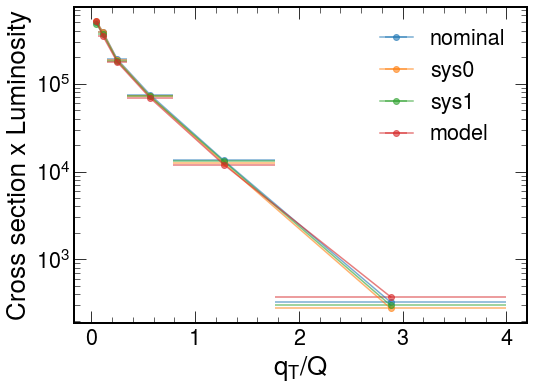

In [55]:
fig = plt.figure(figsize=(8,6))
for key in names.keys():
    plt.errorbar(x[key],y[key],xerr=xerr[key],fmt='o-',label=key,alpha=0.6)
    plt.yscale('log')
    #plt.xscale('log')
    
    plt.legend()
plt.ylabel('Cross section x Luminosity')
plt.xlabel(xtitle)

plt.tight_layout()
fig.savefig('figures/Systematic uncertainties_variations_%s.png'%observable)


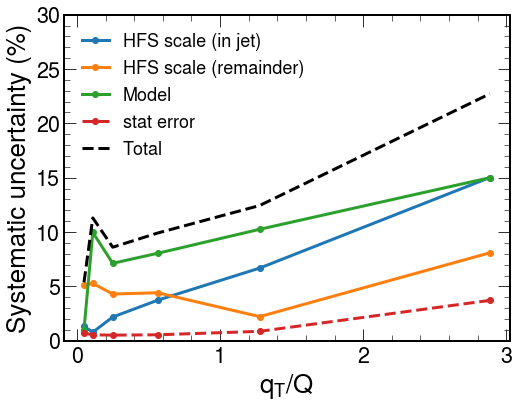

In [56]:
fig = plt.figure(figsize=(8,6))

total = np.zeros(len(y['nominal']))
ratio = {}

for key in y.keys():
    if 'nominal' in key:continue
    ratio[key] = np.divide(y[key],y['nominal']) -1
    total += ratio[key]*ratio[key]
    plt.plot(x['nominal'],100*abs(ratio[key]),'o-',label=label[key],lw=3)

total = np.sqrt(total)
N      = np.multiply( y['nominal'], xerr['nominal']*2.0)
plt.plot(x['nominal'],100*np.sqrt(1/N), 'o--',label = 'stat error ',lw=3)
plt.plot(x['nominal'],100*total, '--',label = 'Total',lw=3,color='k')

plt.ylabel('Systematic uncertainty (%)')
plt.legend(loc='best',fontsize=18)
plt.xlabel(xtitle)
#plt.xscale('log')
plt.ylim([0,30])
plt.show()


fig.savefig('figures/Systematic uncertainties_%s.png'%observable)


In [57]:
up = np.multiply(y['nominal'],(1+total))
do = np.multiply(y['nominal'],(1-total))

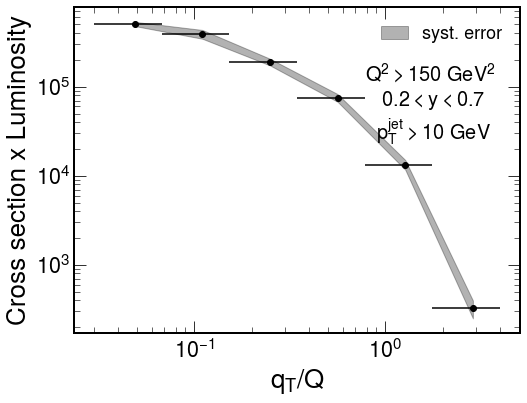

In [58]:
fig,ax = plt.subplots(figsize=(8,6))

plt.fill_between(x['nominal'], do, up,alpha=0.3,color='k',label='syst. error')
plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k')
plt.yscale('log')
plt.ylabel(r'Cross section x Luminosity')
plt.xlabel(xtitle)
plt.text(0.8, 0.7,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=20)
plt.legend(loc='best',fontsize=18)

#plt.title('H1 Preliminary')
if 'dphi' not in observable:
    plt.xscale('log')
plt.show()
fig.savefig('figures/FinalResult_%s.png'%observable)